In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc


def low_rank_approx(k, image_arr, name):
    plt.figure()
    (x, y, z) = image_arr.shape
    res = np.uint(np.zeros(image_arr.shape))
    for d in range(3):
        i_0 = np.uint8(np.copy(image_arr[:, :, d]))
        i = np.zeros((x, y))
        u, s, vh = np.linalg.svd(i_0)
        for j in range(k):
            i += s[j] * np.outer(u[:, j], vh[j].T)
        res[:, :, d] = np.uint8(i)
    res = np.uint8(res)
    mpimg.imsave(name+str(k)+'.png', res)
    plt.imshow(res)
    plt.show()


def driver(img, name):
    image = Image.open(img)
    image_arr = np.asarray(image)
    plt.figure()
    print('Original image:')
    plt.imshow(image_arr)
    plt.show()
    for k in [1, 4, 8, 32, 64, 128, 512]:
        print('k = ' + str(k))
        low_rank_approx(k, image_arr, name)

Original image:


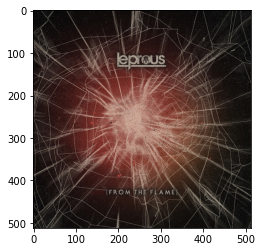

k = 1


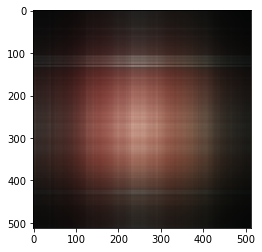

k = 4


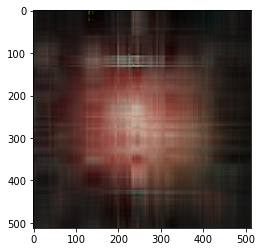

k = 8


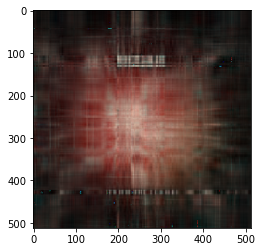

k = 32


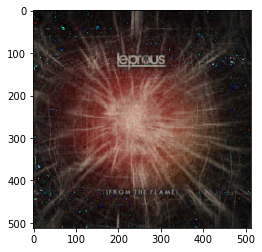

k = 64


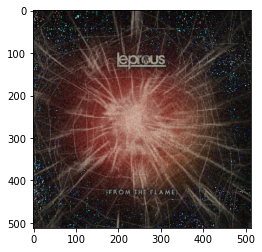

k = 128


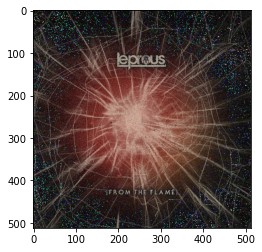

k = 512


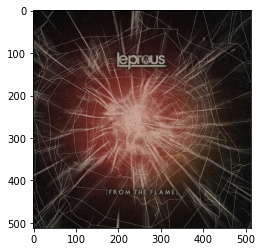

In [30]:
driver('leprous.jpg', 'leprous')

Original image:


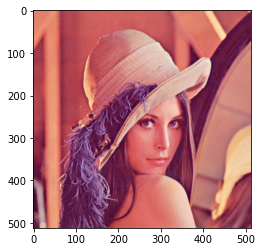

k = 1


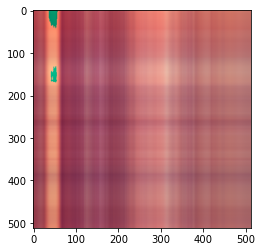

k = 4


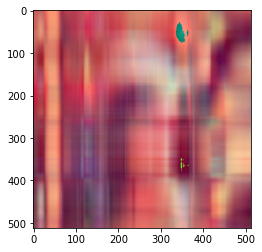

k = 8


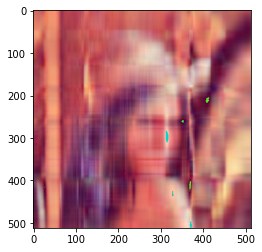

k = 32


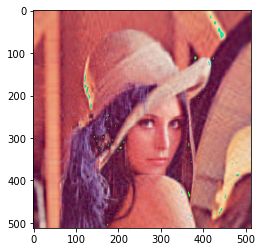

k = 64


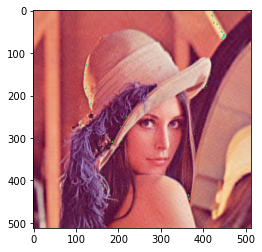

k = 128


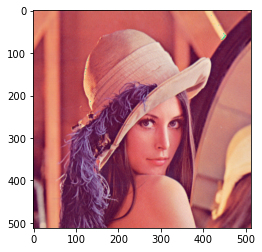

k = 512


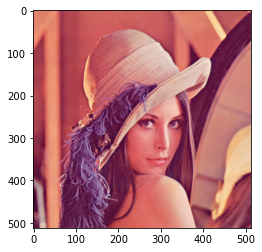

In [33]:
driver('Lenna.png', 'Lenna')